<a href="https://colab.research.google.com/github/jiyun-kong/ML-DL_Basis/blob/main/ch7_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07-1 인공 신경망

## **1) 패션 MNIST**
- 머신러닝에서 붓꽃 데이터셋이 유명하듯이, 딥러닝에서는 MNIST 데이터셋이 유명하다.
  - 손으로 쓴 0 ~ 9 숫자로 이루어져 있다.
  - 숫자 대신에 패션 아이템으로 이루어진 데이터가 패션 MNIST이다.

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)
# 훈련 데이터는 60000개의 이미지로 이루어져있으며, 각 이미지의 크기는 28 * 28 크기이다.

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)
# 테스트 데이터는 10000개의 이미지로 이루어져있으며, 각 이미지의 크기는 28 * 28 크기이다.

(10000, 28, 28) (10000,)


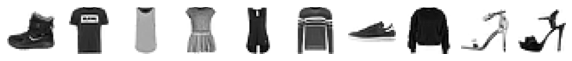

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')  # 축과 라벨 이름 제거
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
# 레이블 당 샘플 개수 확인하기
import numpy as np
print(np.unique(train_target, return_counts=True))
# 종류 : 10개 (0 ~ 9), 각 종류마다 6000개씩 샘플이 들어있다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


##2) 로지스틱 회귀로 패션 아이템 분류하기
- 샘플을 한번에 꺼내기 보다는, 하나씩 꺼내서 모델을 훈련한다.
- 표준화 전처리된 데이터를 사용한다.
  - 특성마다 값의 범위가 다르면 올바르게 손실 함수의 경사를 내려갈 수 없다.
  - 0 ~ 255 픽셀 값을 0 ~ 1 사이의 값으로 정규화한다. 
    - 255로 나누기
- SGDClassifier는 2차원 입력을 다루지 못한다.
  - 1차원 배열로 바꿔준다.

In [ ]:
# 전처리
train_scaled = train_input / 255
train_scaled = train_scaled.reshape(-1,28*28)

In [ ]:
train_scaled.shape

(60000, 784)

In [ ]:
# 선형 회귀와 교차 검증하기
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
np.mean(scores['test_score'])

0.8195666666666668

In [ ]:
# max_iter = 9
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
np.mean(scores['test_score'])

0.8303833333333334

In [ ]:
# max_iter = 20
sc = SGDClassifier(loss='log', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
np.mean(scores['test_score'])

0.8436999999999999

- max_iter를 늘려도 성능이 크게 개선되지 않는다.
- 784개의 픽셀 (특성)이 있다보니 로지스틱 회귀 식이 매우 길어진다.
  - z = $w_1$ * (픽셀1) + $w_2$ * (픽셀2) + ... + $w_784$ * (픽셀784) + b
  - z 값은 티셔츠, 신발 등 10개가 존재한다.
    - 각 분류마다 가중치와 절편 값이 다르다.

##3) 인공 신경망
- 이미지 분류 → 인공 신경망
- 가장 기본적인 인공 신경망은 확률적 졍사 하강법을 사용하는 로지스틱 회귀와 같다.
  - 현재로서는 인공 신경망의 성능을 높일 수 있는 방법을 탐구해야 한다.
- 입력층 : 픽셀값 그 자체이고 특별한 계산을 수행하지 않는다.
  - x_1 ~ x_784
- 출력층 : z 값을 계산하고 이를 바탕으로 클래스를 예측한다.
  - z_1 ~ z_10
  - z 값을 뉴런 / 유닛이라고 부른다.
- 가중치 : z를 만들기 위해 x에 곱해지는 값
  - w_1.2 : z_2를 만들기 위해 픽셀1인 x_1에 곱해지는 가중치

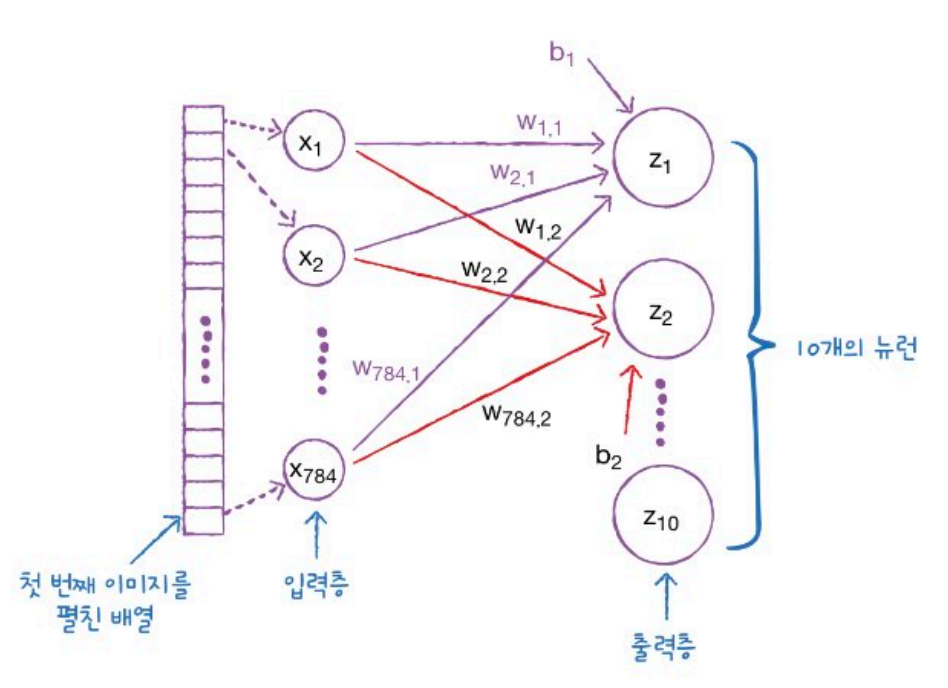


- 딥러닝 (인공 신경망)은 기존의 머신러닝 알고리즘이 잘 해결하지 못해던 문제에서 높은 성능을 발휘하는 새로운 종류의 머신러닝 알고리즘이다.
- 딥러닝은 인공 신경망과 거의 동의어로 사용되는 경우가 많다.
  - 심층 신경망 (deep neural network, DNN)을 딥러닝이라고 부른다.
  - 심층 신경망은 여러 개의 층을 가진 인공 신경망이다.
- 텐서플로 (TensorFlow)
  - 가장 인기가 높은 딥러닝 라이브러리
  - 저수준 API와 고수준 API가 존재한다.
  - 다른 머신러닝 라이브러리와 다른 점 : GPU를 사용하여 인공 신경망을 훈련한다는 것
    - GPU는 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 곱셈과 덧셈을 많이 수행하는 인공 신경망에 큰 도움이 된다.
- 케라스 라이브러리
  - 직접 GPU 연산을 수행하지 않는다.
  - GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용한다.
    - 텐서플로 (케라스의 백엔드 중 하나)
  - 멀티-백엔드 케라스
  - 케라스는 텐서플로의 핵심 API
    - 이제는 케라스와 텐서플로가 거의 동의어가 되었다.

In [ ]:
import tensorflow as tf
from tensorflow import keras

##4) 인공 신경망으로 모델 만들기
- 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용한다.
  - 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적이다.
  - 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸린다.

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
# 훈련 세트로 모델 만들기
# 출력층 만들기 : 10개의 패션 아이템 분류
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) # 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기
model = keras.Sequential(dense)

- model 객체가 신경망 모델
- 활성화 함수 : 뉴런의 선형 방정식 계산 결과에 적용되는 함수
  - 예) 소프트맥스, 시그모이드 함수

## 5) 인공 신경망으로 패션 아이템 분류하기
- 케라스 모델을 훈련하기 전 설정 단계
  - model 객체의 compile () 메서드에서 수행한다.
  - 손실 함수의 종류를 지정한다.
  - 훈련 과정에서 계산하고 싶은 측정값을 지정한다.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

- 이진 분류 : 이진 크로스 엔트로피 (binary_entropy)
  - 양성 클래스 샘플일 경우, 확률 a 그대로 출력
  - 음성 클래스 샘플일 경우, 1 - a로 출력
  <br/>

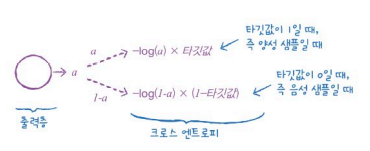
- 다중 분류 : 크로스 엔트로피 (categorical_crossentropy)
  - 원-핫 인코딩
<br />

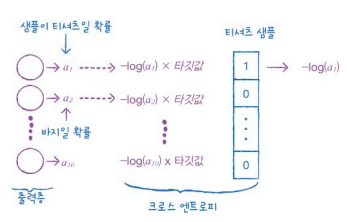  


In [ ]:
# MNIST 데이터 타깃값
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6103 - accuracy: 0.7933
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4776 - accuracy: 0.8411
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4547 - accuracy: 0.8472
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4436 - accuracy: 0.8533
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4363 - accuracy: 0.8554


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4498 - accuracy: 0.8503


[0.4497542679309845, 0.8502500057220459]

# **04-2 2개의 층**

In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ))
dense2 = keras.layers.Dense(10, activation='softmax')

In [5]:
model = keras.Sequential([dense1, dense2])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = keras.Sequential([
                          keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ), name='hidden'),
                          keras.layers.Dense(10, activation='softmax', name='output')
                          ], name='패션 MNIST 모델')

In [8]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5628 - accuracy: 0.8077
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4072 - accuracy: 0.8531
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3725 - accuracy: 0.8647
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3503 - accuracy: 0.8726
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3340 - accuracy: 0.8790


In [12]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )))
model.add(keras.layers.Dense(50, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6591 - accuracy: 0.7801
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4147 - accuracy: 0.8508
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3769 - accuracy: 0.8647
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3527 - accuracy: 0.8716
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3351 - accuracy: 0.8798


In [15]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [18]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5315 - accuracy: 0.8129
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3940 - accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3595 - accuracy: 0.8703
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3371 - accuracy: 0.8777
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3219 - accuracy: 0.8849


In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.8679


[0.3930913507938385, 0.8679166436195374]

In [20]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', mtrics='accuracy')

In [21]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [22]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [23]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [25]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5360 - accuracy: 0.8128
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4000 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3571 - accuracy: 0.8698
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3303 - accuracy: 0.8807
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3101 - accuracy: 0.8862


In [27]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8781


[0.3333790898323059, 0.878083348274231]

# **04-3 신경망 모델 훈련**

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
def model_fn (a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))

  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

print(history.history.keys())

dict_keys(['loss', 'accuracy'])


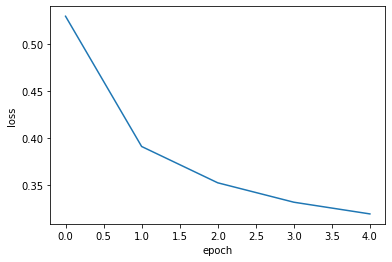

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

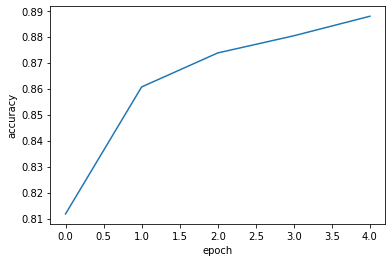

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

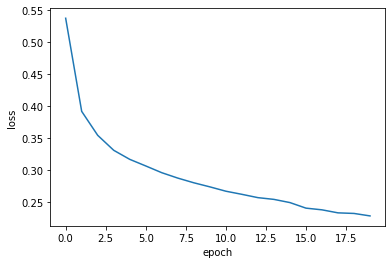

In [7]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


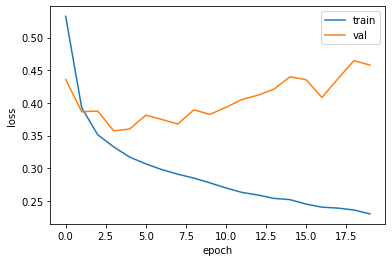

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

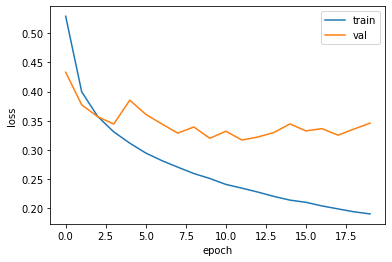

In [13]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

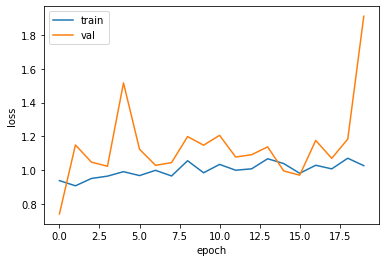

In [14]:
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

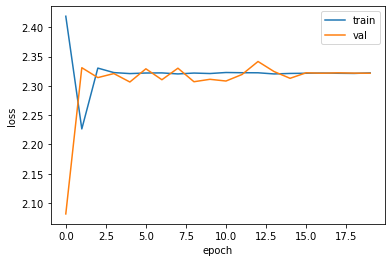

In [15]:
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.15)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


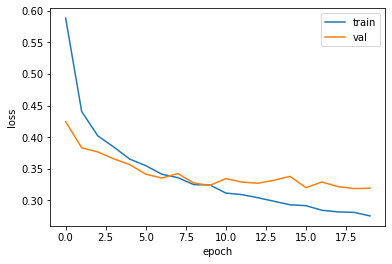

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [18]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [19]:
model.save_weights('model-weights.h5')

In [20]:
model.save('model-whole.h5')

In [21]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Jul 14 05:16 model-weights.h5
-rw-r--r-- 1 root root 982664 Jul 14 05:16 model-whole.h5


In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [23]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(val_labels)
print(np.mean(val_labels == val_target))

[8 8 7 ... 8 8 9]
0.8895


In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [26]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3141 - accuracy: 0.8895


[0.314136266708374, 0.8895000219345093]

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [28]:
print(early_stopping_cb.stopped_epoch)

6


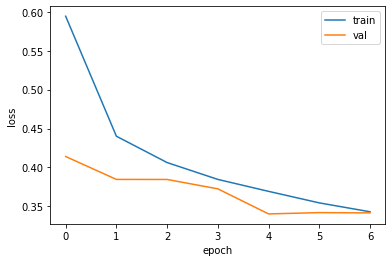

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [30]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3403 - accuracy: 0.8752


[0.3402719795703888, 0.875166654586792]